In [1]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import pairwise_distances

In [2]:
# first we read the dataset using read csv from panda library
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
#show the data imported from iris.csv
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#show first 5 data
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#show last 5 data
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# check for sample size of data
len(diabetes_dataset)

768

In [7]:
#check for dimension of datset
diabetes_dataset.shape

(768, 9)

In [8]:
# check for what are the columns in dataset
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#check for data types
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# more info about dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#describe the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#check for missing values in data
diabetes_dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
#checking summary of missing values. if there has been any null then the values woould be no of NULL.
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#Checking the value count of the target column i.e. 'Species' using value_counts()
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
dataset_new = diabetes_dataset

In [18]:
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [19]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
# Replacing NaN with mean values
diabetes_dataset["Glucose"].fillna(diabetes_dataset["Glucose"].mean(), inplace = True)
diabetes_dataset["BloodPressure"].fillna(diabetes_dataset["BloodPressure"].mean(), inplace = True)
diabetes_dataset["SkinThickness"].fillna(diabetes_dataset["SkinThickness"].mean(), inplace = True)
diabetes_dataset["Insulin"].fillna(diabetes_dataset["Insulin"].mean(), inplace = True)
diabetes_dataset["BMI"].fillna(diabetes_dataset["BMI"].mean(), inplace = True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9664\2574924635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_dataset["Glucose"].fillna(diabetes_dataset["Glucose"].mean(), inplace = True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9664\2574924635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [21]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [22]:
new_dataset = pd.DataFrame(dataset_scaled)
new_dataset

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


In [23]:
#spilting into training and target data
#target data
target_data = new_dataset.iloc[:,8]
target_data.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: 8, dtype: float64

In [24]:
#training data
clustering_data = new_dataset.iloc[:,[1,2,3,4,5]]
clustering_data.head()

,1,2,3,4,5
0,0.670968,0.489796,0.304348,0.170130,0.314928
1,0.264516,0.428571,0.239130,0.170130,0.171779
2,0.896774,0.408163,0.240798,0.170130,0.104294
3,0.290323,0.428571,0.173913,0.096154,0.202454
4,0.600000,0.163265,0.304348,0.185096,0.509202


In [25]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

array([71.43336086, 47.92417896, 40.27519578, 35.55385895, 32.18058753,
       29.00395185, 26.95229675, 25.58600306, 24.31094198, 23.13613936])

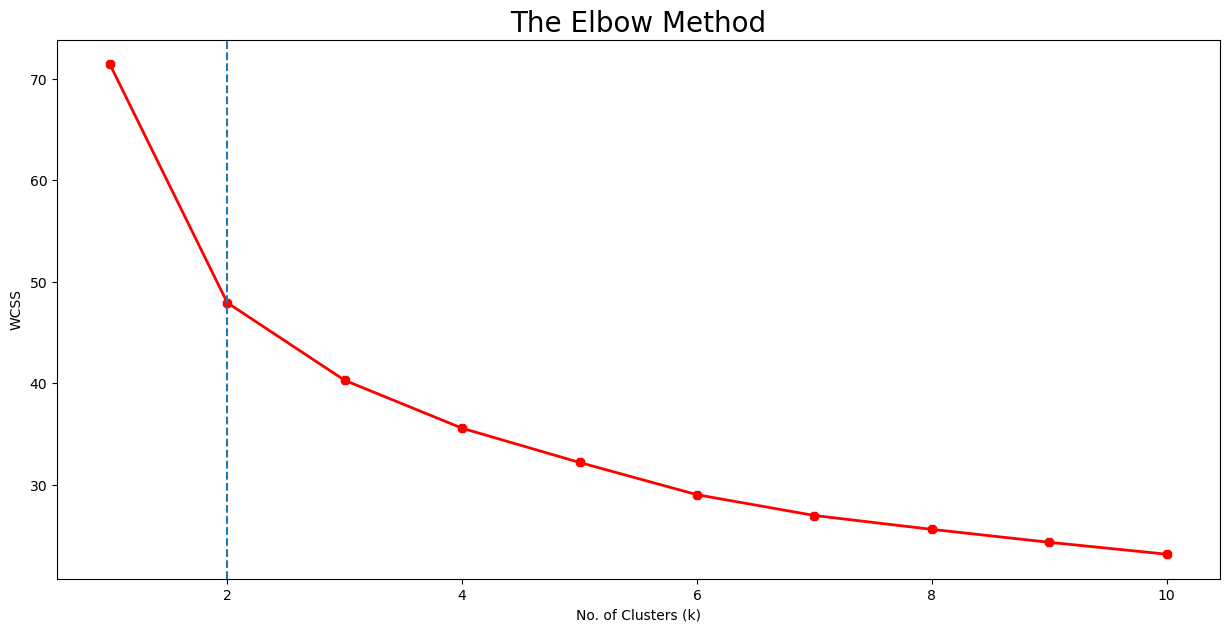

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=2, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# Random Centroid

In [27]:
from sklearn.cluster import KMeans

#convert dataset into array
X = clustering_data.values

#choose the row no of 3 centroids 
initial_indices = np.random.choice(768, size=2, replace=False)
print(initial_indices)
initial_centroids = X[initial_indices]

print("Initial Centroids:")
print(initial_centroids)

kms = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
kms.fit(X)

print("Final Centroids:")
print(kms.cluster_centers_)

[579 407]
Initial Centroids:
[[0.98709677 0.46938776 1.         0.17013008 0.33742331]
 [0.36774194 0.3877551  0.24079804 0.17013008 0.07566462]]
Final Centroids:
[[0.7102116  0.54551867 0.27559481 0.22280396 0.3612702 ]
 [0.38527814 0.46531674 0.2214978  0.1409142  0.25290054]]


In [28]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.iloc[:,[0,1,2,3,4,5]].values

array([[0.67096774, 0.48979592, 0.30434783, 0.17013008, 0.31492843,
        0.        ],
       [0.26451613, 0.42857143, 0.23913043, 0.17013008, 0.17177914,
        1.        ],
       [0.89677419, 0.40816327, 0.24079804, 0.17013008, 0.10429448,
        0.        ],
       ...,
       [0.49677419, 0.48979592, 0.17391304, 0.11778846, 0.16359918,
        1.        ],
       [0.52903226, 0.36734694, 0.24079804, 0.17013008, 0.24335378,
        1.        ],
       [0.31612903, 0.46938776, 0.26086957, 0.17013008, 0.24948875,
        1.        ]])

In [29]:
kms.cluster_centers_

array([[0.7102116 , 0.54551867, 0.27559481, 0.22280396, 0.3612702 ],
       [0.38527814, 0.46531674, 0.2214978 , 0.1409142 , 0.25290054]])

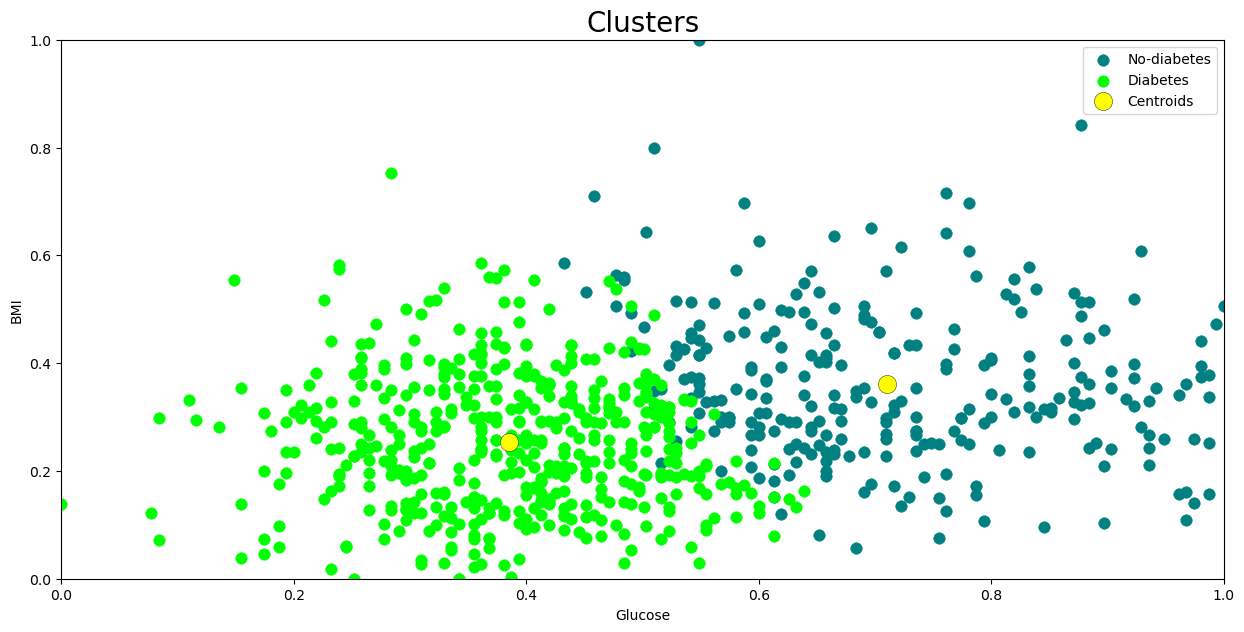

In [30]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0][1],
            y=clusters[clusters['Cluster_Prediction'] == 0][5],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='No-diabetes')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1][1],
            y=clusters[clusters['Cluster_Prediction'] == 1][5],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Diabetes')


plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:,4], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_ylabel('BMI')
ax.set_xlabel('Glucose')
plt.title('Clusters', fontsize = 20)
plt.show()


In [31]:
#intracluster distance- for each iteration- min- (97,98)
cluster_labels = kms.labels_
cluster_centers = kms.cluster_centers_

# Calculate intra-cluster distances
intra_cluster_distances = np.zeros(2)

for i in range(2):
    cluster_points = X[cluster_labels == i]
    intra_cluster_distances[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers[i]], metric='euclidean'))

print("Intra-Cluster Distances:", intra_cluster_distances)
sum=0
for i in range(0,2):
    sum=sum+intra_cluster_distances[i]
print("Sum of intracluster distances is: ",sum)

Intra-Cluster Distances: [ 70.91312505 104.74756962]
Sum of intracluster distances is:  175.6606946743176


In [62]:
# Actual intra-cluster distances
cluster_centers_mean = []
for i in range(num_centroids):
    cluster_points = X[clusters['Cluster_Prediction'] == i]  # Assuming 'clusters' is your DataFrame containing cluster predictions
    centroid_mean = np.mean(cluster_points, axis=0)
    cluster_centers_mean.append(centroid_mean)
# Calculate intra-cluster distances for each cluster
intra_cluster_distances_mean = np.zeros(num_centroids)

for i in range(num_centroids):
    cluster_points = X[clusters['Cluster_Prediction'] == i]  # Assuming 'clusters' is your DataFrame containing cluster predictions
    intra_cluster_distances_mean[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers_mean[i]], metric='euclidean'))

print("Intra-Cluster Distances using mean centroids:", intra_cluster_distances_mean)

# Calculate the sum of intra-cluster distances
total_intra_cluster_distance_mean = np.sum(intra_cluster_distances_mean)
print("Total Intra-Cluster Distance using mean centroids:", total_intra_cluster_distance_mean)

Intra-Cluster Distances using mean centroids: [ 73.45732959 102.09089122]
Total Intra-Cluster Distance using mean centroids: 175.5482208025238


In [33]:
#intercluster
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')
print("Inter cluster distance: ")
print(inter_cluster_distances)
import numpy as np

# Calculate the sum of inter-cluster distances
sum_inter_cluster_distance = np.triu(inter_cluster_distances, k=1).sum()

print("Sum of Inter-Cluster Distances:", sum_inter_cluster_distance)

Inter cluster distance: 
[[0.         0.36522665]
 [0.36522665 0.        ]]
Sum of Inter-Cluster Distances: 0.36522665435009055


In [61]:
#Actual inter cluster distance
inter_cluster_distances_mean = pairwise_distances(cluster_centers_mean, metric='euclidean')
print("Actual Inter-Cluster Distance using mean centroids:")
print(inter_cluster_distances_mean)
sum_inter_cluster_distance_mean = np.triu(inter_cluster_distances_mean, k=1).sum()

print("Sum of Inter-Cluster Distances:", sum_inter_cluster_distance_mean)

Actual Inter-Cluster Distance using mean centroids:
[[0.         0.36260173]
 [0.36260173 0.        ]]
Sum of Inter-Cluster Distances: 0.36260172618978054


In [35]:
# number of elements in each cluster
cluster_assignments = kms.labels_
cluster_counts = np.bincount(cluster_assignments)

# Display it
for cluster_number, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_number}: {count} elements")

Cluster 0: 274 elements
Cluster 1: 494 elements


In [36]:
#actual values: 
# Number of elements in each actual class label
actual_counts = diabetes_dataset['Outcome'].value_counts()

# Display the number of elements in each actual class label
for outcome_label, count in actual_counts.items():
    print(f"Outcome {outcome_label}: {count} elements")

Outcome 0: 500 elements
Outcome 1: 268 elements


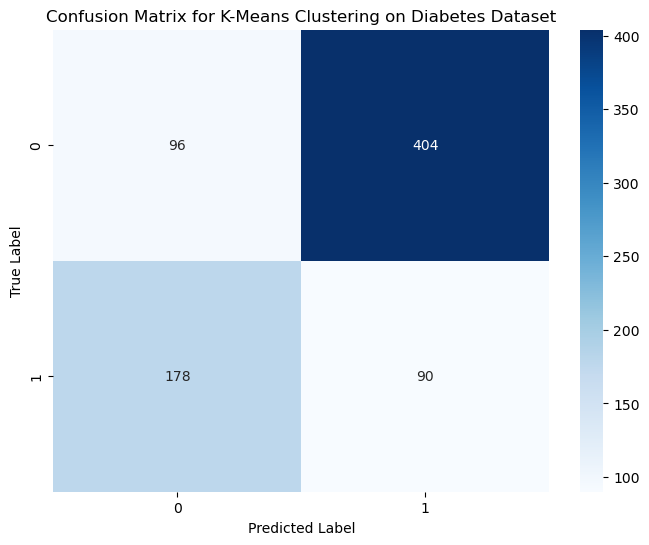

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Map the predicted cluster labels to the actual diabetes labels
cluster_mapping = {
    0: 0,
    1: 1,
}

# Map the cluster labels in the dataframe
clusters['Cluster_Prediction'] = clusters['Cluster_Prediction'].map(cluster_mapping)

# Assuming 'target_data' contains the true labels for the diabetes dataset

# Create the confusion matrix
conf_matrix = confusion_matrix(target_data, clusters['Cluster_Prediction'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_mapping.values(),
            yticklabels=cluster_mapping.values())
plt.title('Confusion Matrix for K-Means Clustering on Diabetes Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Min - Max Centroid

In [39]:
centroid_max = np.max(X, axis=0)
centroid_min = np.min(X, axis=0)
print("max",centroid_max)
print("min",centroid_min)

max [1. 1. 1. 1. 1.]
min [0. 0. 0. 0. 0.]


In [40]:
num_centroids = 2
max_min_centroids = np.random.uniform(centroid_min, centroid_max, size=(num_centroids, len(centroid_max)))

print("Random Centroids:")
print(max_min_centroids)

Random Centroids:
[[0.28097448 0.32040234 0.14977876 0.4672772  0.93720268]
 [0.11037767 0.99816078 0.79736349 0.01425846 0.54258595]]


In [41]:
kms = KMeans(n_clusters=2, init=max_min_centroids, n_init=1)
kms.fit(X)

print("Final Centroids:")
print(kms.cluster_centers_)

Final Centroids:
[[0.70348418 0.54635913 0.27379265 0.21963838 0.36181305]
 [0.38251213 0.46316651 0.22143757 0.14107975 0.25034297]]


In [42]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.iloc[:,[0,1,2,3,4,5]].values

array([[0.67096774, 0.48979592, 0.30434783, 0.17013008, 0.31492843,
        0.        ],
       [0.26451613, 0.42857143, 0.23913043, 0.17013008, 0.17177914,
        1.        ],
       [0.89677419, 0.40816327, 0.24079804, 0.17013008, 0.10429448,
        0.        ],
       ...,
       [0.49677419, 0.48979592, 0.17391304, 0.11778846, 0.16359918,
        1.        ],
       [0.52903226, 0.36734694, 0.24079804, 0.17013008, 0.24335378,
        1.        ],
       [0.31612903, 0.46938776, 0.26086957, 0.17013008, 0.24948875,
        1.        ]])

In [43]:
kms.cluster_centers_

array([[0.70348418, 0.54635913, 0.27379265, 0.21963838, 0.36181305],
       [0.38251213, 0.46316651, 0.22143757, 0.14107975, 0.25034297]])

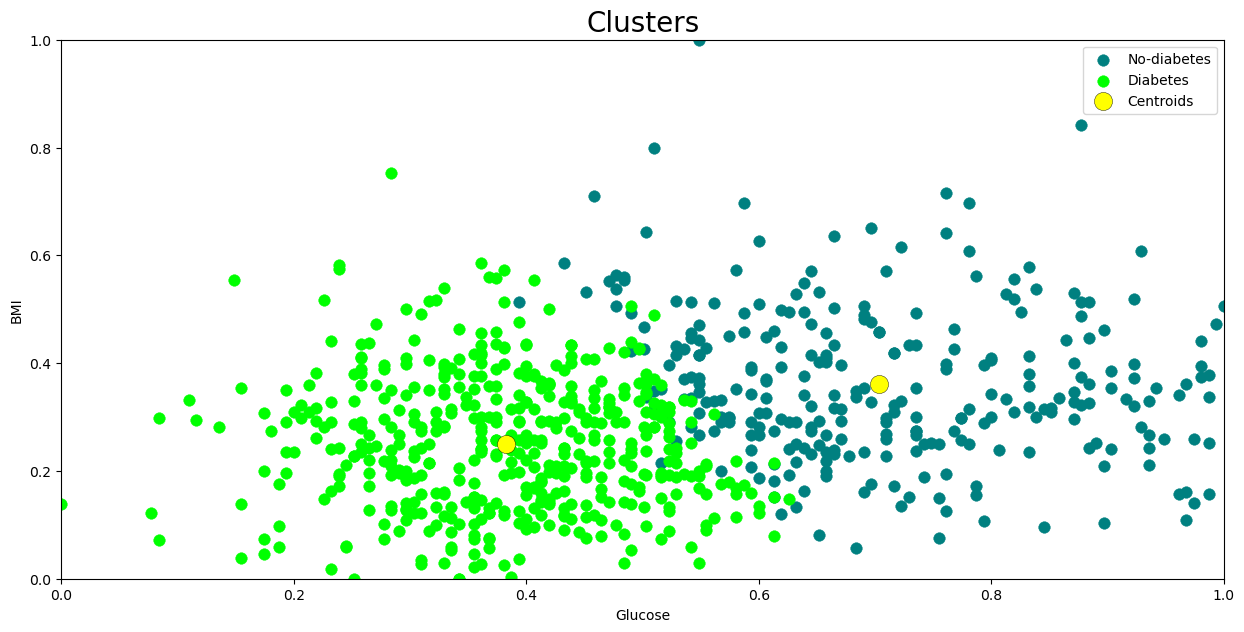

In [44]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0][1],
            y=clusters[clusters['Cluster_Prediction'] == 0][5],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='No-diabetes')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1][1],
            y=clusters[clusters['Cluster_Prediction'] == 1][5],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Diabetes')


plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:,4], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_ylabel('BMI')
ax.set_xlabel('Glucose')
plt.title('Clusters', fontsize = 20)
plt.show()


In [45]:
#intracluster distance- for each iteration- min- (97,98)
cluster_labels = kms.labels_
cluster_centers = kms.cluster_centers_

# Calculate intra-cluster distances
intra_cluster_distances = np.zeros(2)

for i in range(2):
    cluster_points = X[cluster_labels == i]
    intra_cluster_distances[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers[i]], metric='euclidean'))

print("Intra-Cluster Distances:", intra_cluster_distances)
sum=0
for i in range(0,2):
    sum=sum+intra_cluster_distances[i]
print("Sum of intracluster distances is: ",sum)

Intra-Cluster Distances: [ 73.44669851 102.0930138 ]
Sum of intracluster distances is:  175.53971231226723


In [50]:
# Calculate the centroids by mean of all points in each cluster
cluster_centers_mean = []
for i in range(num_centroids):
    cluster_points = X[clusters['Cluster_Prediction'] == i]  # Assuming 'clusters' is your DataFrame containing cluster predictions
    centroid_mean = np.mean(cluster_points, axis=0)
    cluster_centers_mean.append(centroid_mean)
# Calculate intra-cluster distances for each cluster
intra_cluster_distances_mean = np.zeros(num_centroids)

for i in range(num_centroids):
    cluster_points = X[clusters['Cluster_Prediction'] == i]  # Assuming 'clusters' is your DataFrame containing cluster predictions
    intra_cluster_distances_mean[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers_mean[i]], metric='euclidean'))

print("Intra-Cluster Distances using mean centroids:", intra_cluster_distances_mean)

# Calculate the sum of intra-cluster distances
total_intra_cluster_distance_mean = np.sum(intra_cluster_distances_mean)
print("Total Intra-Cluster Distance using mean centroids:", total_intra_cluster_distance_mean)


Intra-Cluster Distances using mean centroids: [ 73.45732959 102.09089122]
Total Intra-Cluster Distance using mean centroids: 175.5482208025238


In [55]:
#intercluster
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')
print("Inter cluster distance: ")
print(inter_cluster_distances)
sum_inter_cluster_distances = np.sum(inter_cluster_distances)
print("Sum of inter-cluster distances:", sum_inter_cluster_distances)

Inter cluster distance: 
[[0.        0.3623288]
 [0.3623288 0.       ]]
Sum of inter-cluster distances: 0.7246575982927607


In [59]:
#actual inter-cluster distance
inter_cluster_distances_mean = pairwise_distances(cluster_centers_mean, metric='euclidean')
print("Actual Inter-Cluster Distance using mean centroids:")
print(inter_cluster_distances_mean)
sum_inter_cluster_distance_mean = np.triu(inter_cluster_distances_mean, k=1).sum()

print("Sum of Inter-Cluster Distances:", sum_inter_cluster_distance_mean)

Actual Inter-Cluster Distance using mean centroids:
[[0.         0.36260173]
 [0.36260173 0.        ]]


In [56]:
# number of elements in each cluster
cluster_assignments = kms.labels_
cluster_counts = np.bincount(cluster_assignments)

# Display it
for cluster_number, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_number}: {count} elements")

Cluster 0: 283 elements
Cluster 1: 485 elements


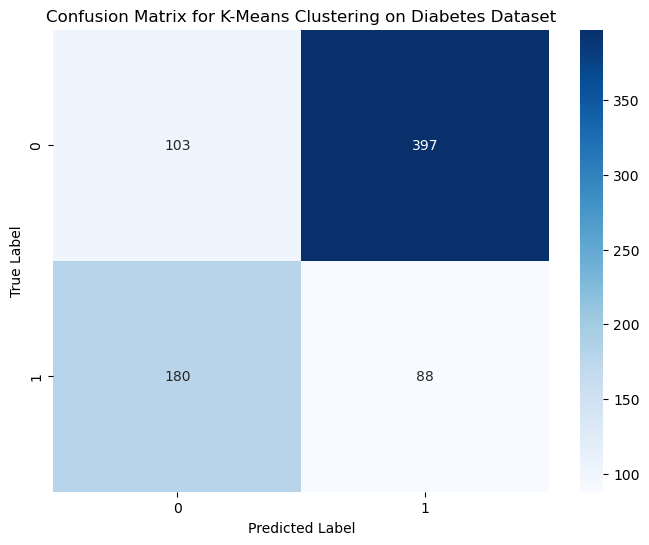

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Map the predicted cluster labels to the actual diabetes labels
cluster_mapping = {
    0: 0,
    1: 1,
}

# Map the cluster labels in the dataframe
clusters['Cluster_Prediction'] = clusters['Cluster_Prediction'].map(cluster_mapping)

# Assuming 'target_data' contains the true labels for the diabetes dataset

# Create the confusion matrix
conf_matrix = confusion_matrix(target_data, clusters['Cluster_Prediction'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_mapping.values(),
            yticklabels=cluster_mapping.values())
plt.title('Confusion Matrix for K-Means Clustering on Diabetes Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
